## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset

In [2]:
df = pd.read_csv('Jumbo & Company_ Attach.csv')

In [3]:
print(df.head())
print(df.info())

      Branch               Store_Name  Dec  Nov  Oct  Sep  Aug
0  Delhi_Ncr      Delhi(Janakpuri) Br  23%  17%  16%  25%  24%
1  Delhi_Ncr      Haryana(Gurgaon) Br  21%  26%  15%  28%   4%
2  Delhi_Ncr     Up(Greater Noida) Br  25%  36%  30%  41%  43%
3       Pune         Pune(Bhosari) Br  33%  33%  36%  13%  32%
4    Gujarat  Ahmedabad(Maninagar) Br  19%  11%  14%  21%  17%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Branch      163 non-null    object
 1   Store_Name  163 non-null    object
 2   Dec         163 non-null    object
 3   Nov         163 non-null    object
 4   Oct         163 non-null    object
 5   Sep         163 non-null    object
 6   Aug         163 non-null    object
dtypes: object(7)
memory usage: 9.0+ KB
None


In [4]:
month_cols = ["Aug", "Sep", "Oct", "Nov", "Dec"]
for col in month_cols:
    df[col] = df[col].str.replace("%", "").astype(float)

In [5]:
df.head(2)

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
0,Delhi_Ncr,Delhi(Janakpuri) Br,23.0,17.0,16.0,25.0,24.0
1,Delhi_Ncr,Haryana(Gurgaon) Br,21.0,26.0,15.0,28.0,4.0


In [6]:
df.describe()

,Dec,Nov,Oct,Sep,Aug
count,163.000000,163.000000,163.000000,163.000000,163.000000
mean,21.723926,21.711656,17.092025,16.730061,12.858896
std,17.327025,13.124628,11.612472,13.451817,11.663956
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.500000,13.000000,10.000000,8.000000,3.500000
50%,20.000000,20.000000,16.000000,15.000000,11.000000
75%,30.000000,29.500000,24.000000,24.500000,19.000000
max,100.000000,70.000000,71.000000,80.000000,60.000000


## Visualization

In [8]:
# Months list for visualization
chrono_cols = ['Aug', 'Sep', 'Oct', 'Nov', 'Dec']

### 1. Monthly Average Trend

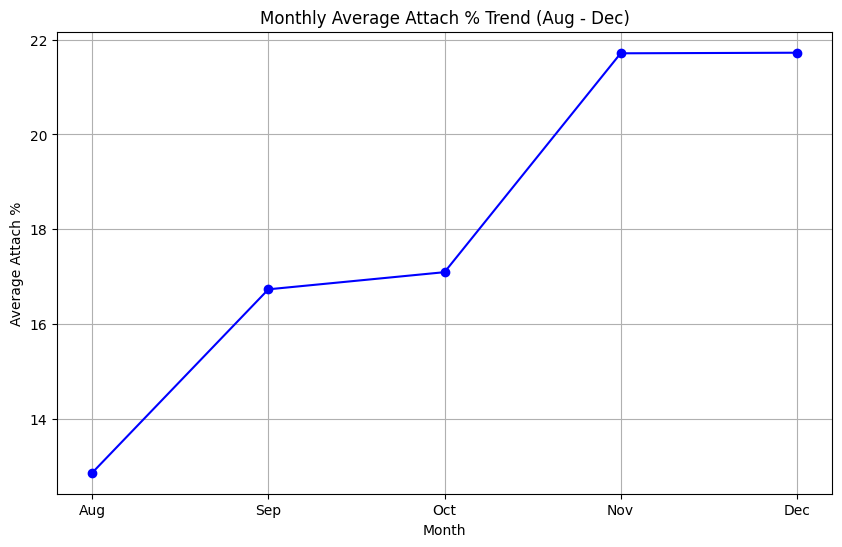

In [10]:
monthly_means = df[chrono_cols].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_means.index, monthly_means.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Average Attach % Trend (Aug - Dec)')
plt.xlabel('Month')
plt.ylabel('Average Attach %')
plt.grid(True)
plt.savefig('Monthly_trend.png')

### 2. Branch Wise Performance

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33976\3470447745.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=branch_performance.index, y=branch_performance.values, palette='viridis')


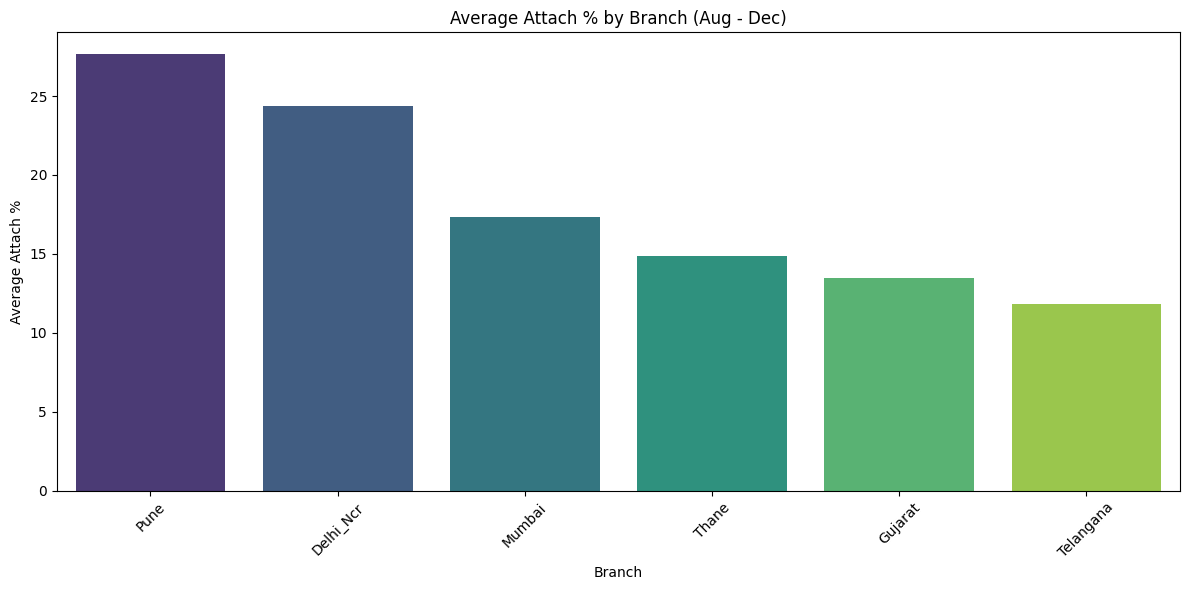

In [11]:
df['Average_5_Months'] = df[chrono_cols].mean(axis=1)
branch_performance = df.groupby('Branch')['Average_5_Months'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=branch_performance.index, y=branch_performance.values, palette='viridis')
plt.title('Average Attach % by Branch (Aug - Dec)')
plt.xticks(rotation=45)
plt.ylabel('Average Attach %')
plt.tight_layout()
plt.savefig('branch_performance.png')

### 3.Boxplot to see distribution/variance within branches

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33976\1854387764.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Branch', y='Attach_Percentage', data=df_melted, palette='Set3')


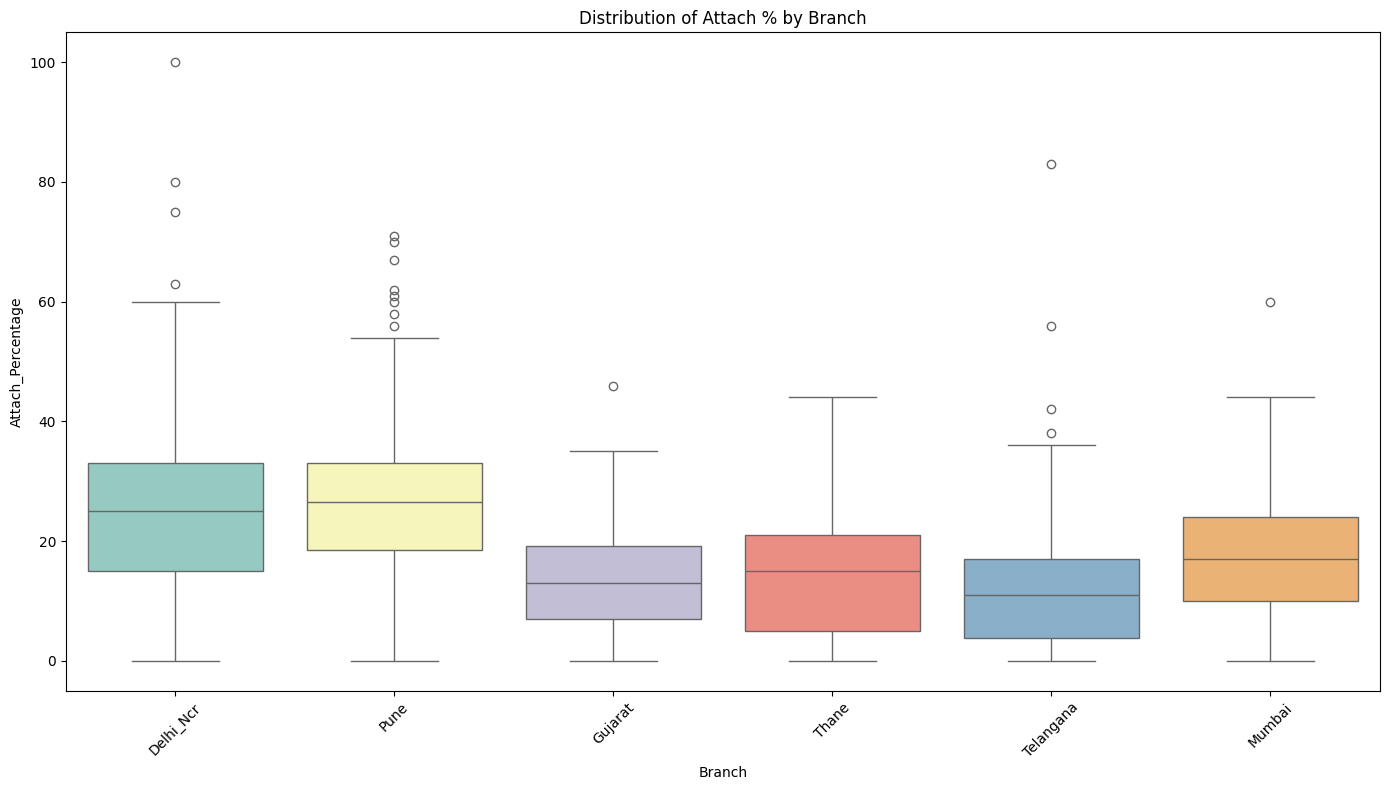

In [13]:
df_melted = df.melt(id_vars=['Branch', 'Store_Name'], value_vars=chrono_cols, var_name='Month', value_name='Attach_Percentage')

plt.figure(figsize=(14, 8))
sns.boxplot(x='Branch', y='Attach_Percentage', data=df_melted, palette='Set3')
plt.title('Distribution of Attach % by Branch')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('branch_distribution.png')

### 4. Store Categorization

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33976\116728630.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, order=['High Performer', 'Mid Performer', 'Low Performer'], palette='pastel')


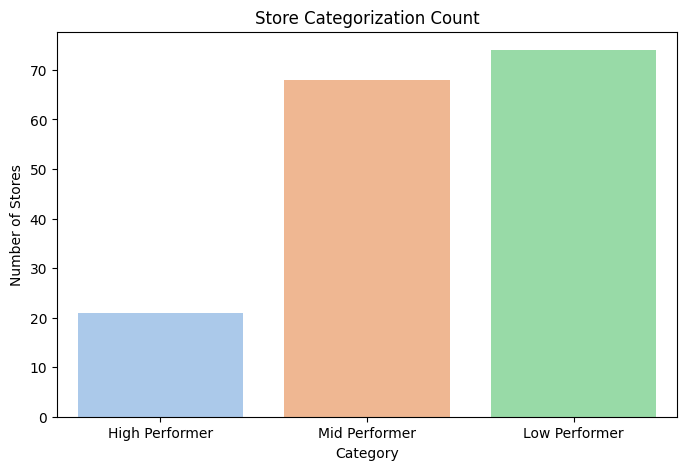

In [16]:
def categorize_store(avg_val):
    if avg_val >= 30:
        return 'High Performer'
    elif avg_val >= 15:
        return 'Mid Performer'
    else:
        return 'Low Performer'

df['Category'] = df['Average_5_Months'].apply(categorize_store)

# Count plot of categories
plt.figure(figsize=(8, 5))
sns.countplot(x='Category', data=df, order=['High Performer', 'Mid Performer', 'Low Performer'], palette='pastel')
plt.title('Store Categorization Count')
plt.ylabel('Number of Stores')
plt.savefig('store_categories.png')

## January Prediction

In [7]:
from sklearn.linear_model import LinearRegression

month_index = {"Aug": 1, "Sep": 2, "Oct": 3, "Nov": 4, "Dec": 5}
predictions = []

for _, row in df.iterrows():
    X = np.array([month_index[m] for m in month_cols]).reshape(-1, 1)
    y = np.array([row[m] for m in month_cols])
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict January (index = 6)
    jan_prediction = model.predict([[6]])[0]
    jan_prediction = max(jan_prediction, 0)  # Avoid negative values
    
    predictions.append(round(jan_prediction, 2))

# Final output
df["Predicted_Jan_Attach_%"] = predictions


In [12]:
df[["Branch","Store_Name","Dec","Predicted_Jan_Attach_%"]].head()

,Branch,Store_Name,Dec,Predicted_Jan_Attach_%
0,Delhi_Ncr,Delhi(Janakpuri) Br,23.0,18.0
1,Delhi_Ncr,Haryana(Gurgaon) Br,21.0,28.4
2,Delhi_Ncr,Up(Greater Noida) Br,25.0,22.7
3,Pune,Pune(Bhosari) Br,33.0,36.0
4,Gujarat,Ahmedabad(Maninagar) Br,19.0,14.6


In [ ]:
df.to_csv('Jan_Attach_predict.csv', index=False)